In [1]:
# Connecting Google colab with google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing requied packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning)

In [3]:
# Reading the 'MPG_Car_Data.csv' file

data = pd.read_csv('/content/drive/MyDrive/Datasets/MPG_Car_Data.csv')
data = data.head(20)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
# Checking the column types

data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,int64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [5]:
# Getting the statistical summaries of the numerical columns

data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000
mean,17.600000,7.100000,311.550000,149.700000,3367.350000,11.875000,70.0,1.250000
std,4.185187,1.518309,122.003656,52.937997,752.294964,3.268168,0.0,0.638666
min,14.000000,4.000000,97.000000,46.000000,1835.000000,8.000000,70.0,1.000000
25%,14.750000,6.000000,199.750000,96.500000,2818.250000,9.875000,70.0,1.000000
50%,15.500000,8.000000,329.000000,150.000000,3476.500000,10.750000,70.0,1.000000
75%,18.750000,8.000000,407.250000,192.000000,3783.250000,14.625000,70.0,1.000000
max,27.000000,8.000000,455.000000,225.000000,4425.000000,20.500000,70.0,3.000000


In [6]:
# Define a function cat_dis that converts the displacement column into categorical form

def cat_dis(value):
  if 68 <= value <= 168:
    return 'Low'
  elif 168 < value <= 233:
    return 'Mild'
  elif 233 < value <= 369:
    return 'Moderate'
  else:
    return 'Severe'

# Applying this functions on the data frame data to create two categorical columns

data['discat'] = data['displacement'].apply(cat_dis)

# Checking the final results

data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,int64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object
discat,object


In [7]:
# Check the new data frame

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,discat
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,Moderate
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,Moderate
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,Moderate
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,Moderate
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,Moderate
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,Severe
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,Severe
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,Severe
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,Severe
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,Severe


In [8]:
data['discat'].unique()

array(['Moderate', 'Severe', 'Low', 'Mild'], dtype=object)

In [9]:
# One hot encoding the 'discat' column of the data dataframe

dummy_data = pd.get_dummies(data.discat).astype(int)
dummy_data

,Low,Mild,Moderate,Severe
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [10]:
# Merging the original dataframe 'data' with the dummy_data data frame using pd.concat()

merged_data = pd.concat([data,dummy_data], axis = 'columns')
merged_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,discat,Low,Mild,Moderate,Severe
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,Moderate,0,0,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,Moderate,0,0,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,Moderate,0,0,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,Moderate,0,0,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,Moderate,0,0,1,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,Severe,0,0,0,1
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,Severe,0,0,0,1
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,Severe,0,0,0,1
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,Severe,0,0,0,1
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,Severe,0,0,0,1


In [11]:
# Droping some columns from the merged_data data frame
# Drop the columns 'displacement', 'discat', 'origin', 'car name', 'model year', 'Low'

final_data = merged_data.drop(['displacement', 'discat', 'origin', 'car name', 'model year'], axis = 'columns')
final_data

,mpg,cylinders,horsepower,weight,acceleration,Low,Mild,Moderate,Severe
0,18.0,8,130,3504,12.0,0,0,1,0
1,15.0,8,165,3693,11.5,0,0,1,0
2,18.0,8,150,3436,11.0,0,0,1,0
3,16.0,8,150,3433,12.0,0,0,1,0
4,17.0,8,140,3449,10.5,0,0,1,0
5,15.0,8,198,4341,10.0,0,0,0,1
6,14.0,8,220,4354,9.0,0,0,0,1
7,14.0,8,215,4312,8.5,0,0,0,1
8,14.0,8,225,4425,10.0,0,0,0,1
9,15.0,8,190,3850,8.5,0,0,0,1


#### Now, in this notebook, a model called 'mixlr_model' is created where the 'mpg' column is output as previous, but as input, we will considering the variables 'accelation', 'cylinders', 'horsepower', 'weight', 'Mild', 'Moderate', 'Severe' as inputs

In [12]:
# Setting up the input and the output variable

# The input variables is denoted by the letter X

X = final_data.drop(['mpg'], axis = 'columns')


# The out variables in denoted by the letter y

y = final_data['mpg']

In [13]:
# Build the Linear Regression Model

mixlr_model = LinearRegression()

# Fit the input (X) and output (y) in the model

mixlr_model.fit(X,y)


LinearRegression()

In [14]:
# Get the model coefficients

# Print the slopes of the model

slopes = mixlr_model.coef_
print('The slopes of the model is:', slopes)

print('-----------------------------------------')

# Print the intercept of the model

intercept = mixlr_model.intercept_
print('The intercept value of the model is:', intercept)

The slopes of the model is: [-1.58279323e+00 -2.38503454e-02 -9.44487247e-05  9.68779524e-02
  8.07398749e-01 -8.23400883e-01  2.40475171e-01 -2.24473038e-01]
-----------------------------------------
The intercept value of the model is: 31.59589185525096


#### The model is successfully build. Now comes the pediction part

1. Predict the 'mpg' of a car having 8 cylinders, 130 horsepower, 3504 weight, 12 acceleration and moderate displacement. The true mpg value is 18

2. Predict the 'mpg' of a car having 4 cylinders, 88 horsepower, 2130 weight, 14.5 acceleration and low displacement. The true mpg value is 27

In [15]:
# Prediction of first required question

mixlr_model.predict([[8,130,3504,12,0,0,1,0]]) # The result is 16.905, not 18

array([16.90506338])

In [16]:
# Prediction of second question

mixlr_model.predict([[4,88,2130,14.5,1,0,0,0]]) # The result is 25.176, not 27

array([25.17684181])

In [17]:
# Create a data frame that will contain the actual and predicted 'mpg' values

mpg_pred = mixlr_model.predict(X) # Predicting the 'mpg' based on the build model
mpg_pred = pd.DataFrame(mpg_pred, columns = ['mpg_pred']) # Convering the ndarray into data frame format

result_data = pd.concat([final_data['mpg'], mpg_pred], axis = 'columns')
result_data

,mpg,mpg_pred
0,18.0,16.905063
1,15.0,16.004012
2,18.0,16.337601
3,16.0,16.434762
4,17.0,16.526438
5,15.0,14.545482
6,14.0,13.922669
7,14.0,13.997448
8,14.0,13.893589
9,15.0,14.637342


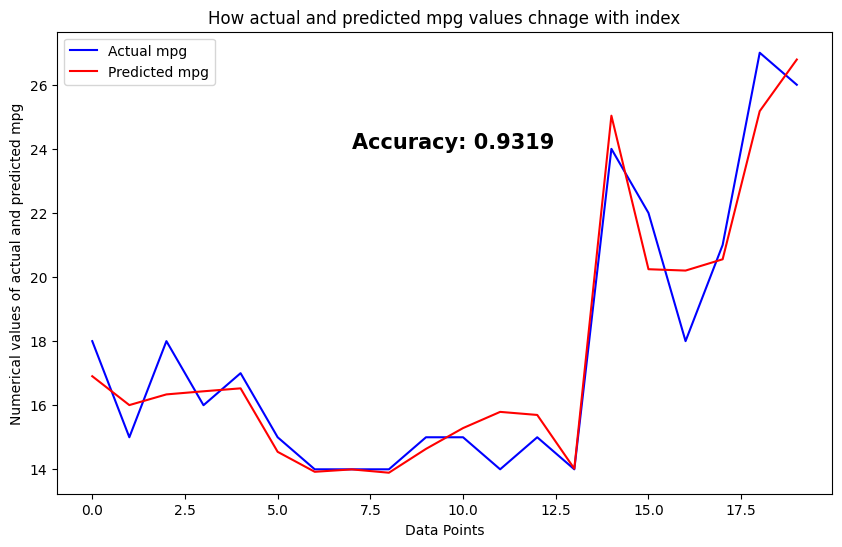

In [18]:
# Observing how the mpg value and mpg_pred values are changing

plt.figure(figsize = (10,6))
plt.plot(result_data.index, result_data['mpg'], label = 'Actual MPG', linestyle='-', color='blue')
plt.plot(result_data.index, result_data['mpg_pred'], label = 'Predicted MPG', linestyle='-', color='red')
plt.xlabel('Data Points')
plt.ylabel('Numerical values of actual and predicted mpg')
plt.title('How actual and predicted mpg values chnage with index')
plt.legend(['Actual mpg', 'Predicted mpg'])
accuracy = mixlr_model.score(X,y)
plt.text(7,24,f'Accuracy: {accuracy:.4f}', color = 'black', fontweight = 'bold', fontsize = 15)
plt.show()

#### In the above codes, one-hot encode is done by using pd.get_dummies() method. However, in most cases this is not the case. The sklearn's modules are better in such situation. The module is preprocessing. The function is Label Encoder. This is used as the categorical variable in my case has a inherited order. So, low<mild<moderate<severe. If there is no such order in your data, one must go for OneHotEncoder

In [19]:
# Creating the data for this practice

revised_data = data.drop(['displacement', 'model year', 'origin', 'car name'], axis = 'columns')
revised_data

,mpg,cylinders,horsepower,weight,acceleration,discat
0,18.0,8,130,3504,12.0,Moderate
1,15.0,8,165,3693,11.5,Moderate
2,18.0,8,150,3436,11.0,Moderate
3,16.0,8,150,3433,12.0,Moderate
4,17.0,8,140,3449,10.5,Moderate
5,15.0,8,198,4341,10.0,Severe
6,14.0,8,220,4354,9.0,Severe
7,14.0,8,215,4312,8.5,Severe
8,14.0,8,225,4425,10.0,Severe
9,15.0,8,190,3850,8.5,Severe


In [20]:
# Import sklearn's LabelEncoder for this process

from sklearn.preprocessing import LabelEncoder

# Set the LabelEncoder object in a variable called le

le = LabelEncoder()

In [21]:
# Now, I want to label encode the 'discat' column and append it back in the revised_data dataframe

revised_data['discat'] = le.fit_transform(revised_data['discat'])
revised_data # It doesn't create any extra column. Moreover, it directly converts into int form, not in boolean form
# Low is 0, mild is 1, moderate is 2 and severe is 3

,mpg,cylinders,horsepower,weight,acceleration,discat
0,18.0,8,130,3504,12.0,2
1,15.0,8,165,3693,11.5,2
2,18.0,8,150,3436,11.0,2
3,16.0,8,150,3433,12.0,2
4,17.0,8,140,3449,10.5,2
5,15.0,8,198,4341,10.0,3
6,14.0,8,220,4354,9.0,3
7,14.0,8,215,4312,8.5,3
8,14.0,8,225,4425,10.0,3
9,15.0,8,190,3850,8.5,3


In [22]:
# Now, once encoding is done, create the input and output variables
# Denote the input variables as X1
# Denote the output variables as y1

X2 = revised_data.drop(['mpg'], axis = 'columns')
y2 = revised_data['mpg']

In [23]:
# Fit the X1 and y1 variables into the mixlr_model

mixlr_model2 = LinearRegression()
mixlr_model2.fit(X2,y2)

LinearRegression()

In [24]:
# Check the coefficients of the mixlr_model2 model

# Print the slopes of the model

slopes = mixlr_model2.coef_
print('The slopes of the model is:', slopes)

print('-----------------------------------------')

# Print the intercept of the model

intercept = mixlr_model2.intercept_
print('The intercept value of the model is:', intercept)

The slopes of the model is: [-1.57861379e+00 -1.99469343e-02 -2.26083536e-04 -1.03488260e-02
 -5.56445801e-01]
-----------------------------------------
The intercept value of the model is: 33.763478004397655


#### The model is successfully build. Now comes the pediction part

1. Predict the 'mpg' of a car having 8 cylinders, 130 horsepower, 3504 weight, 12 acceleration and moderate displacement. The true mpg value is 18

2. Predict the 'mpg' of a car having 4 cylinders, 88 horsepower, 2130 weight, 14.5 acceleration and low displacement. The true mpg value is 27

In [25]:
# Prediction of first required question

mixlr_model2.predict([[8,130,3504,12,2]]) # The result is 16.5121, not 18

array([16.51219198])

In [26]:
# Prediction of second question

mixlr_model2.predict([[4,88,2130,14.5,0]]) # The result is 25.062, not 27

array([25.06207671])

In [27]:
# Create a data frame that will contain the actual and predicted 'mpg' values for the mixlr_model2 model

mpg_pred2 = mixlr_model2.predict(X2) # Predicting the 'mpg' based on the build model
mpg_pred2 = pd.DataFrame(mpg_pred2, columns = ['mpg_pred2']) # Convering the ndarray into data frame format

result_data2 = pd.concat([revised_data['mpg'], mpg_pred2], axis = 'columns')
result_data2

,mpg,mpg_pred2
0,18.0,16.512192
1,15.0,15.776494
2,18.0,16.138976
3,16.0,16.129305
4,17.0,16.340680
5,15.0,14.430820
6,14.0,13.999398
7,14.0,14.113802
8,14.0,13.873262
9,15.0,14.716926


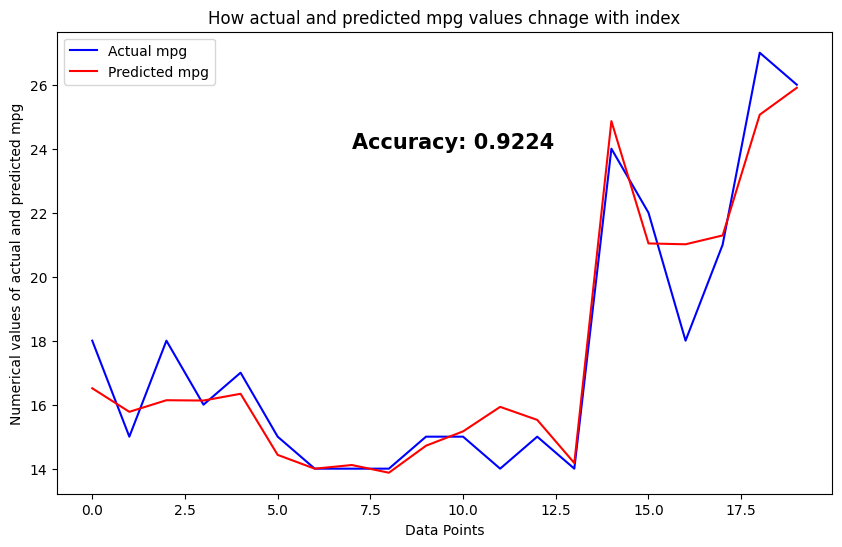

In [28]:
# Observing how the mpg value and mpg_pred values are changing

plt.figure(figsize = (10,6))
plt.plot(result_data2.index, result_data2['mpg'], label = 'Actual MPG', linestyle='-', color='blue')
plt.plot(result_data2.index, result_data2['mpg_pred2'], label = 'Predicted MPG', linestyle='-', color='red')
plt.xlabel('Data Points')
plt.ylabel('Numerical values of actual and predicted mpg')
plt.title('How actual and predicted mpg values chnage with index')
plt.legend(['Actual mpg', 'Predicted mpg'])
accuracy2 = mixlr_model2.score(X2,y2)
plt.text(7,24,f'Accuracy: {accuracy2:.4f}', color = 'black', fontweight = 'bold', fontsize = 15)
plt.show()

#### Now, I am using the OneHotEncoder function available in sklearn library. Though it is not the most efficient choice for this data set in hand, but it will be good to know, how this is done in python. Consider the revised_data dataframe

In [41]:
# Import OneHotEncoder and create an object

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore' , sparse_output = False).set_output(transform = 'pandas')

In [42]:
# Transform the 'discat' column of the revised_data

ohe_data = encoder.fit_transform(revised_data[['discat']])
ohe_data

,discat_0,discat_1,discat_2,discat_3
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


In [44]:
# Now attach the ohe_data with revised_data, drop the 'discat' column

ohe_final = pd.concat([revised_data, ohe_data], axis = 'columns').drop(['discat'], axis = 'columns')
ohe_final

,mpg,cylinders,horsepower,weight,acceleration,discat_0,discat_1,discat_2,discat_3
0,18.0,8,130,3504,12.0,0.0,0.0,1.0,0.0
1,15.0,8,165,3693,11.5,0.0,0.0,1.0,0.0
2,18.0,8,150,3436,11.0,0.0,0.0,1.0,0.0
3,16.0,8,150,3433,12.0,0.0,0.0,1.0,0.0
4,17.0,8,140,3449,10.5,0.0,0.0,1.0,0.0
5,15.0,8,198,4341,10.0,0.0,0.0,0.0,1.0
6,14.0,8,220,4354,9.0,0.0,0.0,0.0,1.0
7,14.0,8,215,4312,8.5,0.0,0.0,0.0,1.0
8,14.0,8,225,4425,10.0,0.0,0.0,0.0,1.0
9,15.0,8,190,3850,8.5,0.0,0.0,0.0,1.0


In [46]:
# Separating Output and Input variable

X3 = ohe_final.drop(['mpg'], axis = 1)
y3 = ohe_final['mpg']

In [47]:
# Build the model as mixlr_model3

mixlr_model3 = LinearRegression()
mixlr_model3.fit(X3,y3)

LinearRegression()

In [48]:
# Check model parameters, coefficients

# Print the slopes of the model

slopes = mixlr_model3.coef_
print('The slopes of the model is:', slopes)

print('-----------------------------------------')

# Print the intercept of the model

intercept = mixlr_model3.intercept_
print('The intercept value of the model is:', intercept)

The slopes of the model is: [-1.58279323e+00 -2.38503454e-02 -9.44487247e-05  9.68779524e-02
  8.07398749e-01 -8.23400883e-01  2.40475171e-01 -2.24473038e-01]
-----------------------------------------
The intercept value of the model is: 31.59589185525096


#### The model is successfully build. Now comes the pediction part

1. Predict the 'mpg' of a car having 8 cylinders, 130 horsepower, 3504 weight, 12 acceleration and moderate displacement. The true mpg value is 18

2. Predict the 'mpg' of a car having 4 cylinders, 88 horsepower, 2130 weight, 14.5 acceleration and low displacement. The true mpg value is 27

In [49]:
# Prediction of first required question

mixlr_model3.predict([[8,130,3504,12,0,0,1,0]]) # The result is 16.905, not 18

array([16.90506338])

In [50]:
# Prediction of second question

mixlr_model3.predict([[4,88,2130,14.5,1,0,0,0]]) # The result is 25.176, not 27

array([25.17684181])

In [52]:
# Check model accuracy

mixlr_model3.score(X3,y3) # Very close to the result of pd.get_dummies() method

0.9318932081771494